PROBLEM STATEMENT :-   Developing a machine learning model for diamond price prediction, leveraging key features such as carat ,clarity,
 cut quality, and color grade etc. The objective is to enhance pricing accuracy in the diamond industry, benefiting jewelers, 
 investors, and consumers.


Importing Module


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing CSV data as Pandas DataFrame 

In [2]:
df = pd.read_csv('data/gemstone.csv')
df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
1,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
2,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
3,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
4,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
5,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
6,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
7,1.10,Premium,D,SI1,60.7,55.0,6.74,6.71,4.08,6468
8,0.50,Good,E,VS1,61.1,58.2,5.08,5.12,3.11,1932
9,0.71,Ideal,D,SI2,61.6,55.0,5.74,5.76,3.54,2767


In [3]:
df = df.drop(df.columns[0], axis=1)
df.head(10)



,cut,color,clarity,depth,table,x,y,z,price
0,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
1,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
2,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
3,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
4,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
5,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
6,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
7,Premium,D,SI1,60.7,55.0,6.74,6.71,4.08,6468
8,Good,E,VS1,61.1,58.2,5.08,5.12,3.11,1932
9,Ideal,D,SI2,61.6,55.0,5.74,5.76,3.54,2767


In [4]:
df.shape


(18906, 9)

DATA CHECK TO PERFORM  -----

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [5]:
#checking missing value
df.isna().sum()

cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
#dropping na value

df = df.dropna()

In [7]:
df.isna().sum()

cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
#checking Duplicates

df.duplicated().sum()

0

In [9]:
#removing duplicate value
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18906 entries, 0 to 18905
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cut      18906 non-null  object 
 1   color    18906 non-null  object 
 2   clarity  18906 non-null  object 
 3   depth    18906 non-null  float64
 4   table    18906 non-null  float64
 5   x        18906 non-null  float64
 6   y        18906 non-null  float64
 7   z        18906 non-null  float64
 8   price    18906 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [12]:
df.head()

,cut,color,clarity,depth,table,x,y,z,price
0,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
1,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
2,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
3,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
4,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836


In [13]:
df.sample(5)

,cut,color,clarity,depth,table,x,y,z,price
2640,Premium,I,SI2,63.0,58.0,6.97,6.93,4.38,5612
15743,Very Good,G,VS1,59.9,57.4,5.69,5.75,3.42,2309
12708,Ideal,E,VS1,61.6,55.6,5.19,5.24,3.22,2019
6750,Ideal,F,VVS1,62.0,55.0,4.84,4.81,2.99,1389
14702,Ideal,D,VS2,61.6,56.0,4.55,4.57,2.81,852


In [14]:
#Checking the number of unique values of each column

df.nunique()

cut           5
color         7
clarity       8
depth       167
table       108
x           397
y           392
z           264
price      5449
dtype: int64

In [15]:
# statistics of data set

df.describe()


,depth,table,x,y,z,price
count,18906.000000,18906.000000,18906.000000,18906.000000,18906.000000,18906.000000
mean,61.747440,57.463033,5.651329,5.651086,3.489407,2963.253993
std,1.453595,2.253048,0.836682,0.832066,0.522486,1995.691599
min,50.800000,50.100000,4.010000,3.990000,1.070000,715.000000
25%,61.000000,56.000000,4.890000,4.890000,3.010000,1151.000000
50%,61.800000,57.000000,5.690000,5.700000,3.520000,2368.500000
75%,62.500000,59.000000,6.390000,6.380000,3.960000,4427.000000
max,73.600000,79.000000,9.100000,8.970000,5.670000,8061.000000


In [16]:
# X , Y , Z cant be zero as it is dimension. so removing whose vaalue is 0.
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]
df.shape

(18906, 9)

In [17]:
df.describe()

,depth,table,x,y,z,price
count,18906.000000,18906.000000,18906.000000,18906.000000,18906.000000,18906.000000
mean,61.747440,57.463033,5.651329,5.651086,3.489407,2963.253993
std,1.453595,2.253048,0.836682,0.832066,0.522486,1995.691599
min,50.800000,50.100000,4.010000,3.990000,1.070000,715.000000
25%,61.000000,56.000000,4.890000,4.890000,3.010000,1151.000000
50%,61.800000,57.000000,5.690000,5.700000,3.520000,2368.500000
75%,62.500000,59.000000,6.390000,6.380000,3.960000,4427.000000
max,73.600000,79.000000,9.100000,8.970000,5.670000,8061.000000


In [18]:
#there is outlier here , so removing 10% from both bottom and top

top_threshold = df['price'].quantile(0.90) 
bottom_threshold = df['price'].quantile(0.10)

df = df[(df['price'] >= bottom_threshold ) & (df['price'] <= top_threshold ) ]

df.shape

(15135, 9)

In [19]:
# cat and num columns



numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])

print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns : ['cut', 'color', 'clarity']


In [20]:
df[categorical_columns]["cut"].value_counts()



cut
Ideal        6100
Premium      3767
Very Good    3241
Good         1469
Fair          558
Name: count, dtype: int64

In [21]:
df[categorical_columns]["color"].value_counts()



color
E    3054
G    2988
F    2787
H    2137
D    2083
I    1347
J     739
Name: count, dtype: int64

In [22]:
df[categorical_columns]["clarity"].value_counts()

clarity
SI1     4023
VS2     3026
SI2     2933
VS1     2017
VVS2    1228
VVS1    1024
IF       616
I1       268
Name: count, dtype: int64

In [23]:
# Numerical column Describe
df.describe()

,depth,table,x,y,z,price
count,15135.000000,15135.000000,15135.000000,15135.000000,15135.000000,15135.000000
mean,61.745332,57.502914,5.651384,5.650952,3.489142,2735.594186
std,1.492976,2.286946,0.724228,0.720576,0.454435,1517.843219
min,52.200000,50.100000,4.150000,4.120000,1.070000,855.000000
25%,61.000000,56.000000,5.110000,5.110000,3.160000,1345.000000
50%,61.800000,57.000000,5.690000,5.700000,3.520000,2368.000000
75%,62.500000,59.000000,6.280000,6.270000,3.890000,4021.000000
max,73.600000,79.000000,8.110000,8.060000,5.290000,6076.000000


In [24]:
# Categorical column describe
df[categorical_columns].describe()

,cut,color,clarity
count,15135,15135,15135
unique,5,7,8
top,Ideal,E,SI1
freq,6100,3054,4023


In [25]:
#to see for outlier again
top_50 =df.nlargest(50 , 'price')
#top_50

In [26]:
df.shape

(15135, 9)

In [27]:
df.columns

Index(['cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [28]:
df["clarity"].unique()

array(['IF', 'VS1', 'SI1', 'SI2', 'VS2', 'VVS2', 'I1', 'VVS1'],
      dtype=object)

In [29]:
df["cut"].unique()

array(['Premium', 'Ideal', 'Good', 'Very Good', 'Fair'], dtype=object)

In [30]:
df["color"].unique()

array(['G', 'F', 'H', 'E', 'D', 'J', 'I'], dtype=object)

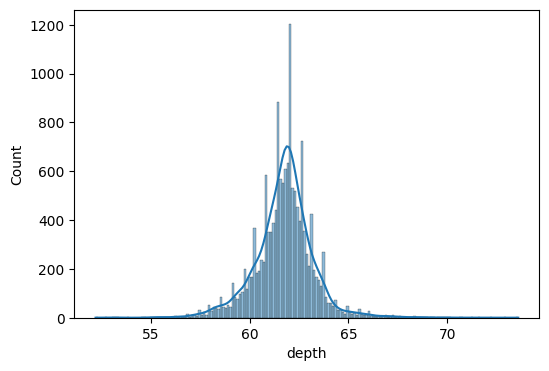

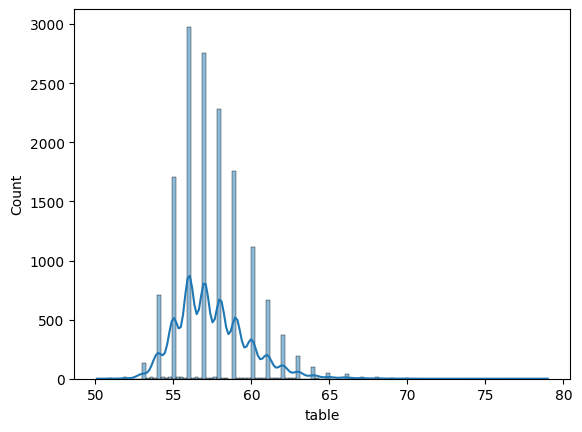

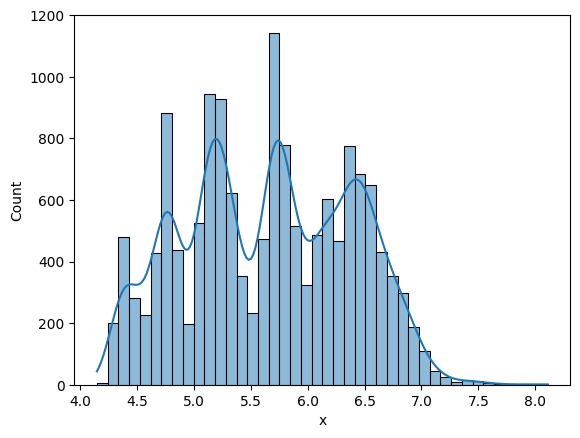

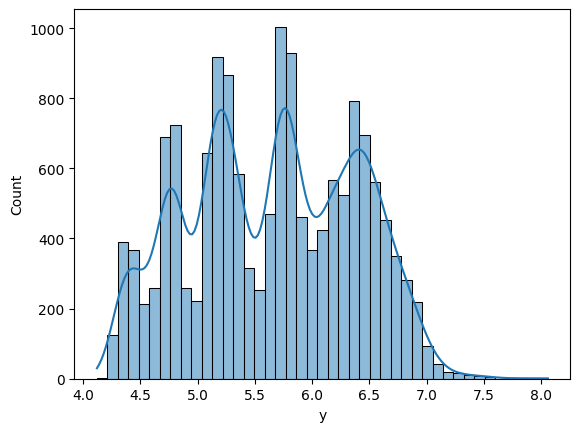

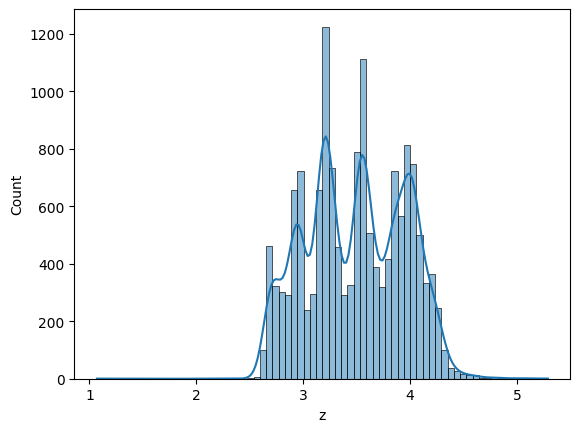

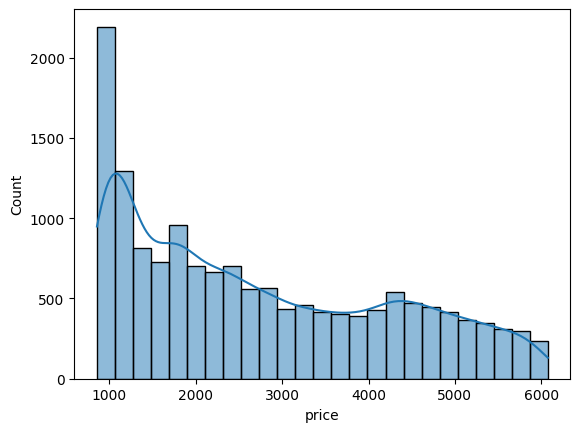

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))


for col in numerical_columns:
    sns.histplot(data=df,x=col,kde=True)
    print("\n")
    plt.show()

In [32]:
#saving  cleaned data after EDA,

import os



file_name = 'gemstone.csv'

if os.path.exists(file_name):
    os.remove(file_name)

df.to_csv(file_name , index = False)